# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implemenntation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy
#import sklearn
from sklearn.cross_validation import train_test_split
# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
#assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
#print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))




Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
    
# TODO: Number of training examples
n_train =  len(X_train)
# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 42 # the class num inresult in signnames

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 42


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

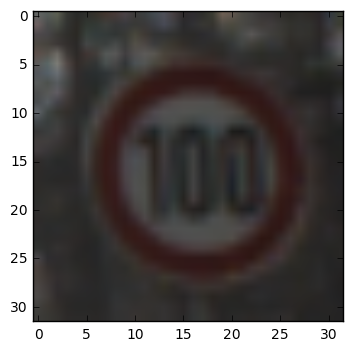

11151
the index in train is 11151
the y_train is 7
===== the gray image |=========
image shape = (32, 32)


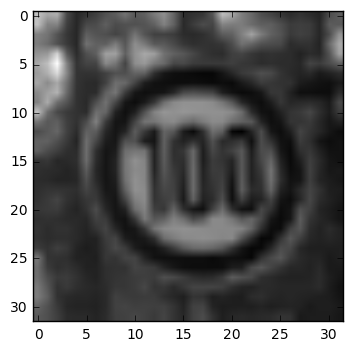

==== GaussianBlue and Edge =====


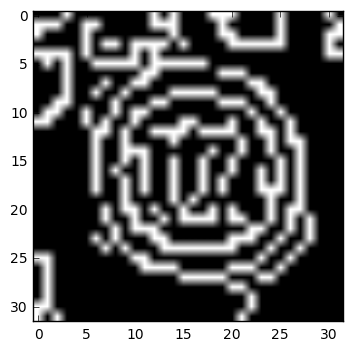

====shwo the count of the train ======


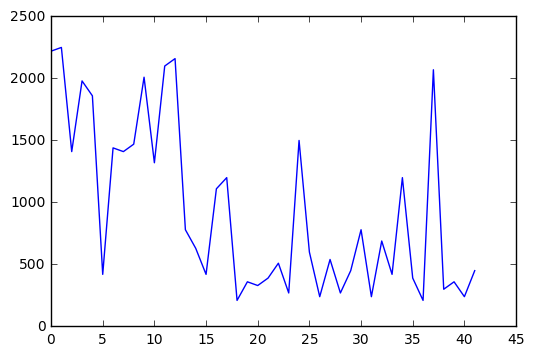

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline
#image = plt.imread(X_train[0])
index = random.randint(0,len(X_train))
image = X_train[index]

plt.imshow(image)
plt.show()
print(index)
print('the index in train is {}'.format(index))
print('the y_train is {}'.format(y_train[index]))

print("===== the gray image |=========")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print("image shape =",gray.shape)

plt.imshow(gray, cmap='gray')
plt.show()

#print("==== GaussianBlue =====")
# Define a kernel size for Gaussian smoothing / blurring
#kernel_size = 5
#blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

print("==== GaussianBlue and Edge =====")
# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 10
high_threshold = 150
edges = cv2.Canny(image, low_threshold, high_threshold)

plt.imshow(edges, cmap='Greys_r')
plt.show()

# Display the image
#plt.imshow(edges, cmap='Greys_r')


print( "====shwo the count of the train ======" )
## shwo the count of the train 
list = []
for index in range(n_classes):
    point = 0
    list.append(point)

for index in range(len(X_train)):
    listIndex = y_train[index] -1
    #value = list[listIndex]
    #value = int(value) + 1
    list[listIndex] += 1
    
plt.plot(list)
plt.show()

#plt.plot([1,2,3,4])
#plt.ylabel('some numbers')
#plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [5]:
## Preprocessed the data
X_train_1d = []
X_validation_1d = []
is_convert2gray = False;
is_convert2edge = False;
data_shape = 3
low_threshold = 10
high_threshold = 150
def convert_data(x): 
    result = []
    for index in range(len(x)):
        image = x[index]        
        if is_convert2gray:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        if is_convert2edge:
            image = cv2.Canny(image, low_threshold, high_threshold)
        if is_convert2edge or is_convert2gray:
            image = result.reshape(32,32,1)
        result.append(image)
    return result
print(" Training Set:   {} samples".format(len(X_train)))
X_train = convert_data(X_train)
#X_validation = convert_data(X_validation)
#X_test = convert_data(X_test)
color_data_len = X_train[0].shape[2]
print(" Training Set:   {} samples".format(len(X_train)))
print(" Is Convert Data To Gray ?" , is_convert2gray)
print(" Is Convert Data To Gray ?" , is_convert2edge)
print(" Image data shape =", X_train[0].shape)
print(" Color data len  =", color_data_len)

 Training Set:   39209 samples
 Training Set:   39209 samples
 Is Convert Data To Gray ? False
 Is Convert Data To Gray ? False
 Image data shape = (32, 32, 3)
 Color data len  = 3


### Question 1 
_Describe how you preprocessed the data. Why did you choose that technique?_


**Answer: 

In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [7]:
### Generate additional data

In [8]:
## split the data into training/validation/testing sets here.
X_train,X_validation, y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2,random_state=1)

print()
print("Training Set:   {} samples".format(len(X_train)))
#print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))
print("Validation Set:       {} samples".format(len(X_validation)))


Training Set:   31367 samples
Test Set:       12630 samples
Validation Set:       7842 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset ( with generated data) from the original dataset?_wget https://dl.google.com/cloudsql/cloud_sql_proxy.linux.amd64


**Answer:**

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [10]:
## basic function
## convolutional func
def conv2d(is_act,x,W,b,strides =1,padding = 'VALID',):
    result = tf.nn.conv2d(x,W, strides =[1,strides,strides,1] , padding = padding)
    result = tf.nn.bias_add(result,b)
    if is_act:
        return tf.nn.relu(result)
    else :
        return result
def maxpool2d(x,k=2):
    return tf.nn.max_pool(x,ksize = [1,k,k,1],strides = [1,k,k,1], padding = 'VALID')
def fullyConnected(x,W,b):
    result = tf.reshape(x[-1,W.get_shape().aslist()[0]])
    result = tf.add(tf.matmul(result,W),b)
    result = tf.nn.relu(result)
    result = tf.nn.dropout(result,dropout)
    return result


In [11]:
from tensorflow.contrib.layers import flatten
mu = 0
sigma = 0.1
    
def le_net(x): 
    
## initial weights and baises
    weights = {
        'conv1': tf.Variable(tf.random_normal([5, 5, 3, 8])),
        'conv2': tf.Variable(tf.random_normal([5, 5, 8, 32]))
   #     'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    #    'out': tf.Variable(tf.random_normal([1024, n_classes]))

    }
    biases = {

        'bc1': tf.Variable(tf.random_normal([8])),
        'bc2': tf.Variable(tf.random_normal([32]))
    #    'bd1': tf.Variable(tf.random_normal([1024])),
   #     'out': tf.Variable(tf.random_normal([n_classes]))
    }
     # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x8. 4x4x32
    conv1 = conv2d(True,x,weights['conv1'],biases['bc1'],strides = 1, padding='VALID',)
    

    # SOLUTION: Pooling. Input = 28x28x8. Output = 14x14x8. 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. 14x14x8 Output = 10x10x32
    conv2 = conv2d(True,conv1,weights['conv2'],biases['bc2'],strides = 1, padding='VALID',)    

    
    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x64. Output = 800.
    ft0   = flatten(conv2) #800
    ft1   = flatten(conv1) #1568
    fc0 = tf.concat(1, [ft0, ft1])

    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 120.
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(2368, 84), mean = mu, stddev = sigma))
    #fc1_b = tf.Variable(tf.random_normal([84]))
    #fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    #fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    #fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #fc2_b  = tf.Variable(tf.random_normal([84]))
    #fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    #fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(2368, 42), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.random_normal([42]))
    logits = tf.matmul(fc0, fc3_W) + fc3_b
    
    return logits

In [12]:
from tensorflow.contrib.layers import flatten

def ms_net(x): 
    mu = 0
    sigma = 0.1
    
## initial weights and baises
    weights = {
        'conv1': tf.Variable(tf.random_normal([5, 5, 3, 8])),
        'conv2': tf.Variable(tf.random_normal([3 ,3, 8, 32])),
        'conv3': tf.Variable(tf.random_normal([3, 3, 32, 64]))
   #     'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    #    'out': tf.Variable(tf.random_normal([1024, n_classes]))

    }
    biases = {

        'bc1': tf.Variable(tf.random_normal([8])),
        'bc2': tf.Variable(tf.random_normal([32])),
        'bc3': tf.Variable(tf.random_normal([64]))
    #    'bd1': tf.Variable(tf.random_normal([1024])),
   #     'out': tf.Variable(tf.random_normal([n_classes]))
    }
    
    #stage 1
    #input 32x32x1 output 28x28x8
    conv1 = conv2d(False,x,weights['conv1'],biases['bc1'],strides = 1, padding='VALID')
    #input 32x32x1 output 14x14x8
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')    
    conv1 = tf.nn.relu(conv1)
    
    
    #stage 2
    #input 14x14x8 output 12x12x32
    conv2 = conv2d(False,conv1,weights['conv2'],biases['bc2'],strides = 1, padding='VALID')
    #input 12x12x32 output 6x6x32
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')    
    conv2 = tf.nn.relu(conv2)
    #input 4x4x64
    conv3 = conv2d(False,conv2,weights['conv3'],biases['bc3'],strides = 1, padding='VALID')
    ft0_conv1 = flatten(conv1)#len = 14x14x8 = 1568
    ft0_conv2 = flatten(conv2)#len = 6x6x32 = 1152
    ft0_conv3 = flatten(conv3)# len = 4x4x64 = 1024
    # 1568 + 800 = 2368
    #ft1 = ft0_conv1
    #ft1.extend(ft0_conv2)
    #ft1[1568:1568] = ft0_conv2
    ft1 = tf.concat(1, [ft0_conv1, ft0_conv2])
    ft1 = tf.concat(1, [ft1, ft0_conv3])
    
    #medium ## add a fully connect layer will decressed the Validation Accuracy 
    #fc0_W = tf.Variable(tf.truncated_normal(shape=(3744, 1024), mean = mu, stddev = sigma))
    #fc0_b = tf.Variable(tf.random_normal([1024]))
    #fc0   = tf.matmul(ft1, fc0_W) + fc0_b
    
    #fc0 = tf.nn.relu(fc0)
    
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3744, n_classes), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.random_normal([n_classes]))
    fc1   = tf.matmul(ft1, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    #fc1    = tf.nn.relu(fc1)## add this will low the Validation acc 
    return fc1


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.

Training...
X_train shape =  (32, 32, 3)
EPOCH 1 ...
Validation Accuracy = 0.601

EPOCH 2 ...
Validation Accuracy = 0.724

EPOCH 3 ...
Validation Accuracy = 0.796

EPOCH 4 ...
Validation Accuracy = 0.838

EPOCH 5 ...
Validation Accuracy = 0.849

EPOCH 6 ...
Validation Accuracy = 0.870

EPOCH 7 ...
Validation Accuracy = 0.885

EPOCH 8 ...
Validation Accuracy = 0.887

EPOCH 9 ...
Validation Accuracy = 0.900

EPOCH 10 ...
Validation Accuracy = 0.901

EPOCH 11 ...
Validation Accuracy = 0.905

EPOCH 12 ...
Validation Accuracy = 0.903

EPOCH 13 ...
Validation Accuracy = 0.915

EPOCH 14 ...
Validation Accuracy = 0.913

EPOCH 15 ...
Validation Accuracy = 0.916

EPOCH 16 ...
Validation Accuracy = 0.911

EPOCH 17 ...
Validation Accuracy = 0.916

EPOCH 18 ...
Validation Accuracy = 0.918

EPOCH 19 ...
Validation Accuracy = 0.916

EPOCH 20 ...
Validation Accuracy = 0.895

EPOCH 21 ...
Validation Accuracy = 0.896

EPOCH 22 ...
Validation Accuracy = 0.911

EPOCH 23 ...
Validation Accuracy = 0.902

EP

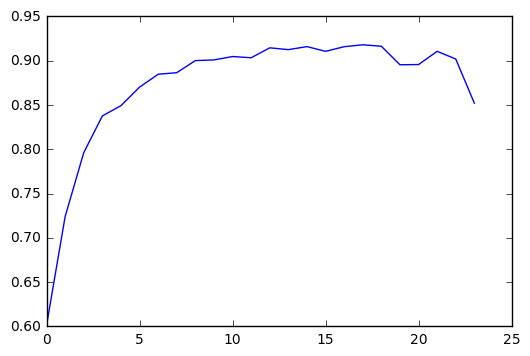

In [14]:
import tensorflow as tf
from sklearn.utils import shuffle
##
learning_rate = 0.001  #ms_net learning_rate = 0.0005  epochs = 20    
epochs = 25            
batch_size = 256
# tf Graph input
x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,n_classes)


keep_prob = tf.placeholder(tf.float32)
# Modelh
#logits = conv_net(x,keep_prob)
logits = ms_net(x)
#logits = le_net(x)


# Define loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)
# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_oper = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_oper, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
validation_accuracy_list = []
most_accuracy = 0
epoch_count = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
#    X_train = X_train_gray
#    X_Validation = X_validation_gray
    print("Training...")
    print("X_train shape = ",X_train[0].shape)
    for i in range(epochs):
        
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, len(X_train), batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)      
        
        validation_accuracy_list.append(validation_accuracy)

        epoch_count +=1
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if validation_accuracy > most_accuracy:
            most_accuracy = validation_accuracy
        else:
            if (most_accuracy -validation_accuracy) > 0.05:
                break
        
    print("break EPOCH = ", )
    saver.save(sess, './lenet')
    print("Model saved")
    
    
plt.plot(validation_accuracy_list)
plt.show()
#+end_src

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [0]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [0]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [0]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

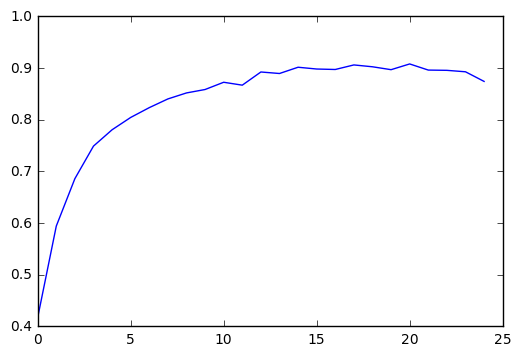

Model saved
EPOCH 25 ...
Validation Accuracy = 0.874

break EPOCH = 
EPOCH 24 ...
Validation Accuracy = 0.893

EPOCH 23 ...
Validation Accuracy = 0.896

EPOCH 22 ...
Validation Accuracy = 0.896

EPOCH 21 ...
Validation Accuracy = 0.908

EPOCH 20 ...
Validation Accuracy = 0.897

EPOCH 19 ...
Validation Accuracy = 0.903

EPOCH 18 ...
Validation Accuracy = 0.906

EPOCH 17 ...
Validation Accuracy = 0.897

EPOCH 16 ...
Validation Accuracy = 0.898

EPOCH 15 ...
Validation Accuracy = 0.902

EPOCH 14 ...
Validation Accuracy = 0.890

EPOCH 13 ...
Validation Accuracy = 0.893

EPOCH 12 ...
Validation Accuracy = 0.867

EPOCH 11 ...
Validation Accuracy = 0.873

EPOCH 10 ...
Validation Accuracy = 0.859

EPOCH 9 ...
Validation Accuracy = 0.852

EPOCH 8 ...
Validation Accuracy = 0.840

EPOCH 7 ...
Validation Accuracy = 0.824

EPOCH 6 ...
Validation Accuracy = 0.805

EPOCH 5 ...
Validation Accuracy = 0.781

EPOCH 4 ...
Validation Accuracy = 0.749

EPOCH 3 ...
Validation Accuracy = 0.686

EPOCH 2 ...
Va

In [21]:
import tensorflow as tf
from sklearn.utils import shuffle
##
learning_rate = 0.001  #ms_net learning_rate = 0.0005  epochs = 2import tensorflow as tf
from sklearn.utils import shuffle
##
learning_rate = 0.001  #ms_net learning_rate = 0.0005  epochs = 20    
epochs = 25            
batch_size = 256
# tf Graph input
x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,n_classes)


keep_prob = tf.placeholder(tf.float32)
# Modelh
#logits = conv_net(x,keep_prob)
logits = ms_net(x)
#logits = le_net(x)


# Define loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)
# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_oper = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_oper, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
validation_accuracy_list = []
most_accuracy = 0
epoch_count = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
#    X_train = X_train_gray
#    X_Validation = X_validation_gray
    print("Training...")
    print("X_train shape = ",X_train[0].shape)
    for i in range(epochs):
        
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, len(X_train), batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)      
        
        validation_accuracy_list.append(validation_accuracy)

        epoch_count +=1
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if validation_accuracy > most_accuracy:
            most_accuracy = validation_accuracy
        else:
            if (most_accuracy -validation_accuracy) > 0.05:
                break
        
    print("break EPOCH = ", )
    saver.save(sess, './lenet')
    print("Model saved")
    
    
plt.plot(validation_accuracy_list)
plt.show()
#+end_src0    
epochs = 25            
batch_size = 256
# tf Graph input
x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,n_classes)


keep_prob = tf.placeholder(tf.float32)
# Modelh
#logits = conv_net(x,keep_prob)
logits = ms_net(x)
#logits = le_net(x)


# Define loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)
# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_oper = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_oper, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
validation_accuracy_list = []
most_accuracy = 0
epoch_count = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
#    X_train = X_train_gray
#    X_Validation = X_validation_gray
    print("Training...")
    print("X_train shape = ",X_train[0].shape)
    for i in range(epochs):
        
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, len(X_train), batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)      
        
        validation_accuracy_list.append(validation_accuracy)

        epoch_count +=1
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if validation_accuracy > most_accuracy:
            most_accuracy = validation_accuracyimport tensorflow as tf
from sklearn.utils import shuffle
##
learning_rate = 0.001  #ms_net learning_rate = 0.0005  epochs = 20    
epochs = 25            
batch_size = 256
# tf Graph input
x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,n_classes)


keep_prob = tf.placeholder(tf.float32)
# Modelh
#logits = conv_net(x,keep_prob)
logits = ms_net(x)
#logits = le_net(x)


# Define loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)
# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_oper = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_oper, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
validation_accuracy_list = []
most_accuracy = 0
epoch_count = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
#    X_train = X_train_gray
#    X_Validation = X_validation_gray
    print("Training...")
    print("X_train shape = ",X_train[0].shape)
    for i in range(epochs):
        
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, len(X_train), batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)      
        
        validation_accuracy_list.append(validation_accuracy)

        epoch_count +=1
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if validation_accuracy > most_accuracy:
            most_accuracy = validation_accuracy
        else:
            if (most_accuracy -validation_accuracy) > 0.05:
                break
        
    print("break EPOCH = ", )
    saver.save(sess, './lenet')
    print("Model saved")
    
    
plt.plot(validation_accuracy_list)
plt.show()
#+end_src
        else:
            if (most_accuracy -validation_accuracy) > 0.05:
                break
        
    print("break EPOCH = ", )
    saver.save(sess, './lenet')
    print("Model saved")
    
    
plt.plot(validation_accuracy_list)
plt.show()
#+end_src